In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from movie_data_processing import partial_match_mean

In [56]:
df = pd.read_csv("imdb_movie_dataset.csv") # test

In [57]:
df.shape
# gives num of (rows, cols)

(1000, 12)

In [58]:
df.head() # displays the first few rows to give an idea of the dataset's layout

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [59]:
df.columns # lists the names of the cols of the dataset 

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [61]:
df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [ ]:
df.describe() #info about numeric data in dataset

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Observations: the timeline of the dataset is from 2006-2016 (Year)

In [ ]:
earliest_year = df['Year'].min()
print(earliest_year)

In [64]:
max_year = df['Year'].max()
print(max_year)

2016


Context: From December 2007 to June 2009, the US economy experienced a financial crisis that would result in national job loss, stock market declines, housing market crashes, and other harmful consequences to the American people, later referred to as the Great Recession.

Did movies released between 2006 and 2007 receive higher revenues than movies released in 2008 or 2009?

How did the number of movies released in a year change after 2008, if at all?

What movie genre(s) had the most number of releases in a year and how did that change before and after 2008? 

In [66]:
# df.loc["index_name"] select rows by index and/or index name
# df.iloc[0] select rows by position
# df["col_name"] selects by cols

In [67]:
df.isnull().sum() # lists the number of null values per col

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

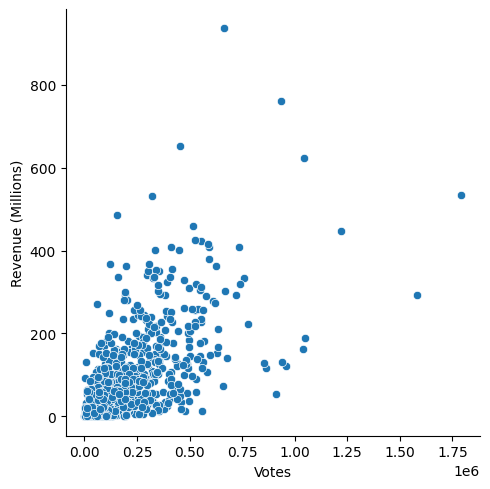

In [68]:
# Checking relationships between cols
# sns.relplot(x="Rating", y="Revenue (Millions)", data=df) # High rated movies are more likely to report higher revenues
sns.relplot(x="Votes", y="Revenue (Millions)", data=df)

In [69]:
# df.info()
# df.count()
print(df['Genre'].dtype)

object


In [70]:
# Goal: replace all null vals of Revenue col with mean of Revenue cols for all movies that share the same genre(s)
# Ex: if an action movie has null for Revenue, replace with mean of Revenue of all action movies

# Exact Means: If Genre of rows are an exact match and replace null Revenue val withtake the mean of all other rows with same Genre
matched_genre_revs = df.dropna(subset=["Revenue (Millions)"]).groupby("Genre")["Revenue (Millions)"].mean()
matched_genre_revs

Genre
Action                        131.560000
Action,Adventure              223.740000
Action,Adventure,Biography     16.500000
Action,Adventure,Comedy        95.733571
Action,Adventure,Crime         90.620000
                                 ...    
Mystery,Thriller               73.533333
Romance,Sci-Fi,Thriller        62.450000
Sci-Fi                         20.760000
Sci-Fi,Thriller                64.510000
Thriller                        0.320000
Name: Revenue (Millions), Length: 195, dtype: float64

In [71]:
# Partial Means: Multiple values in Genre -> parse, match to first genre label, add mean for null in Revenue
df["Revenue (Millions)"] = df.apply(partial_match_mean, axis=1, exact_means = matched_genre_revs)     

df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2020,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2020,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2020,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2020,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2020,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2020,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2020,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2020,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2020,93,5.6,4881,NaN,22.0


In [72]:
null_rows = df[df["Revenue (Millions)"].isna()]
null_rows

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2020,89,6.4,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2020,108,6.7,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2020,83,6.8,222,NaN,NaN
39,40,5- 25- 77,"Comedy,Drama","Alienated, hopeful-filmmaker Pat Johnson's epi...",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2020,113,7.1,241,NaN,NaN
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2020,73,2.7,496,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
977,978,Amateur Night,Comedy,Guy Carter is an award-winning graduate studen...,Lisa Addario,"Jason Biggs, Janet Montgomery,Ashley Tisdale, ...",2020,92,5.0,2229,NaN,38.0
978,979,It's Only the End of the World,Drama,"Louis (Gaspard Ulliel), a terminally ill write...",Xavier Dolan,"Nathalie Baye, Vincent Cassel, Marion Cotillar...",2020,97,7.0,10658,NaN,48.0
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2020,99,7.1,63785,NaN,89.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2020,111,6.2,27585,NaN,45.0


In [73]:
df["Revenue (Millions)"] = df.apply(partial_match_mean, axis=1, exact_means = matched_genre_revs)    
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2020,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2020,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2020,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2020,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2020,123,6.2,393727,325.02,40.0
